In [ ]:
## Basic
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
## Excel
import os
#import xlwt
from openpyxl import load_workbook
## Data process
from scipy.interpolate import interp1d #Interpolation∏
from scipy.signal import savgol_filter #Smo oth
import math
from math import dist
import time

#import cv2

import random
from IPython import display
# aka import ipympl
from scipy.signal import savgol_filter #Smooth
from scipy.optimize import curve_fit,fmin

import struct
from scipy.optimize import minimize


: 

In [2]:
cm =1/2.54
def fig_pre_def(fx=8, fy=6,lw=1,dpi = 200):
    cm =1/2.54
    plt.rcParams['figure.dpi'] = dpi
    plt.rc('font', family='Helvetica')         # 自型
    plt.rcParams['axes.linewidth'] = lw     # 設置外框的寬度
    return  plt.figure(figsize=(fx*cm,fy*cm))   
    ax = fig.add_subplot(1, 1, 1)
def fig_post_def(xticks =(None,None),yticks =(None,None), 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None,
                 title=None,
                 lg_fs = 6,lb_fs = 8,
                 unit = 1/2.54, SVG = False):
    if xticks[0] != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xticks[0]))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xticks[1]))    
    if yticks[0] != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yticks[0]))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(yticks[1]))
    #plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    #plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    ax.tick_params(axis='x', labelsize= lb_fs)
    ax.tick_params(axis='y', labelsize= lb_fs)
    ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
    
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=lb_fs)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=lb_fs)

    if SVG == True:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
        plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
        mpl.rcParams.update(new_rc_params)
    plt.gca().set_position([0, 0, 1, 1])


    plt.legend(fontsize=lg_fs,title=title,title_fontsize=lg_fs,frameon= False)
    plt.rcParams['figure.dpi'] = 80
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#plt.scatter(x,y, alpha=0.6,linewidth=0,s=30*cm,label=' ')
#plt.plot(x,y     ,'--ob',markersize=8*cm,linewidth=3*cm,mew=0,label='point source')
#fig_post_def()

# Compton edge calcualtion

In [3]:
def compton_edge(gamma_E):
    E_edge = gamma_E*((2*gamma_E)/(0.511+2*gamma_E))
    return(E_edge)
def LO_to_channel(LO,channel):
    return()

In [4]:
def gauss_wo_baseline(x,  A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
def gauss_fit_wo_baseline(x, y):  
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    try:  
        popt, pcov = curve_fit(gauss_wo_baseline, x, y, p0=[1, mean, sigma], maxfev=1000)
        return popt
    except RuntimeError:
        print("Error - curve_fit failed")
        return  [0,mean,sigma]

In [5]:
def gaussian(x, A,x0,sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
def GEB_fit_improve(E,osc,x,alpha,beta,gamma):
    Gaussian_distribution = np.zeros(len(x))
    for E_i,osc_i in zip(E,osc):
        FWHM = alpha+beta*((E_i+gamma*E_i**2)**0.5)
        if (E_i+gamma*E_i**2)<0:
            sigma =0
        else:
            sigma =  FWHM/2.355
        Gaussian_distribution_temp = gaussian(x,1,E_i,sigma)
        Gaussian_distribution+= osc_i*Gaussian_distribution_temp
    return Gaussian_distribution

In [6]:
def sorting(input_data, bin_number ,lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    
    return Bin_center,hist

In [7]:
compton_edge(4.4)

4.158522178068951

# Import file

In [62]:
Ch4_Cs_137_data = np.loadtxt('../../../data/HV_calibration/HV1600-850/CH4@DT5730B_1173_Espectrum_20220211_C137_Ch0_3in30cm_HV1600_Ch4_2in30cm_Ch6_2in30cmHV850_TH35_24hours_20230212_173324.txt')
Ch4_Co60_data = np.loadtxt('../../../data/HV_calibration/HV1600-850/Spectrum_CH4@DT5730B_1173_20220210_Co60_Ch0_3in30cm_HV1600_Ch4_2in30cm_Ch6_2in30cmHV850_TH35_24hours.txt')
#Ch6_data = np.loadtxt('../../../data/HV_calibration/Spectrum_CH6@DT5730B_1173_20221124_TH3535_Co60_ch0_3inches_66ns_HV1600_d30cm_Ch4A6B_2inches_66ns_HV850_8hrs.txt')


# CS-137

In [314]:
#Sim_2in_Co60= np.loadtxt('')
exp_2in_Ch4_Cs137_y   = np.loadtxt('../../../data/HV_calibration/HV1600-850/CH4@DT5730B_1173_Espectrum_20220216_Cs137_Ch4_2in10cm_HV850_TH35_24hours_20230216_180139.txt')
Sim_2in_Ch4_Cs137_raw = np.loadtxt('../../../data/HV_calibration/2023_EJ309_LO_Calibration/202302_2inches_EJ309_0.662MeV_isotropic_Energy_deposited.txt')



In [9]:
bin_Sim_2in_Ch4_Cs137, Sim_2in_Ch4_Cs137 =sorting(Sim_2in_Ch4_Cs137_raw,10000,0,10)



In [10]:
del Sim_2in_Ch4_Cs137_raw

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


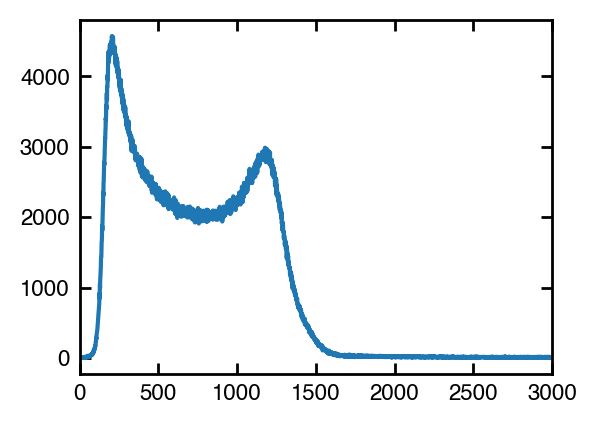

In [11]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

exp_2in_Ch4_Cs137_x = np.arange(0,len(exp_2in_Ch4_Cs137_y),1)
plt.plot(exp_2in_Ch4_Cs137_x,exp_2in_Ch4_Cs137_y)
fig_post_def(xlim=(0,3000))

(0.0, 2000.0)

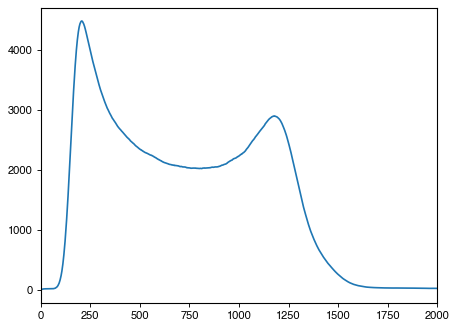

In [12]:
from scipy.signal import savgol_filter #Smooth
exp_2in_Ch4_Cs137_y_smoothed = savgol_filter(exp_2in_Ch4_Cs137_y, 101, 3) 

plt.plot(exp_2in_Ch4_Cs137_x,exp_2in_Ch4_Cs137_y_smoothed)
plt.xlim(0,2000)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


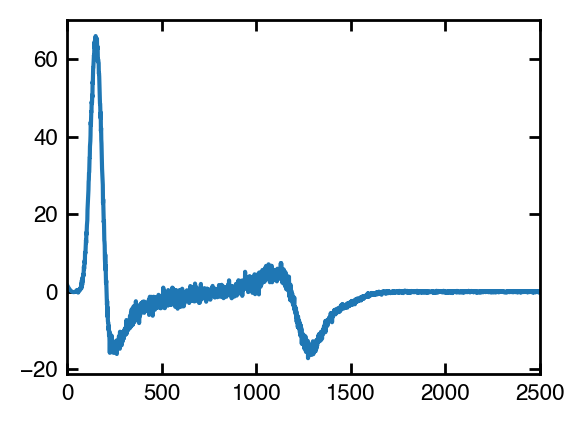

In [13]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

exp_2in_Ch4_Cs137_y_smoothed_diff = np.diff(exp_2in_Ch4_Cs137_y_smoothed, n=1)
plt.plot(exp_2in_Ch4_Cs137_x[:-1],exp_2in_Ch4_Cs137_y_smoothed_diff)
fig_post_def(xlim=(0,2500))


In [14]:
def gauss_wo_baseline(x,  A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
def gauss_fit_wo_baseline(x, y):  
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    try:  
        popt, pcov = curve_fit(gauss_wo_baseline, x, y, p0=[1, mean, sigma], maxfev=1000)
        return popt
    except RuntimeError:
        print("Error - curve_fit failed")
        return  [0,mean,sigma]

[ -15.17392346 1275.49691049  -43.49003498]


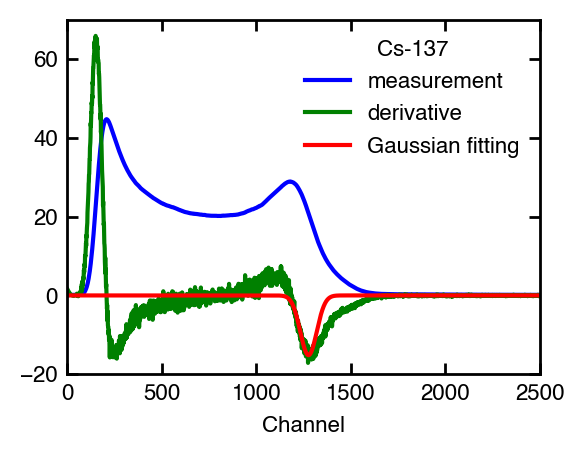

In [244]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

Cs137_ROI=np.arange(1150,1300,1)
Cs137_fitting_parameter = gauss_fit_wo_baseline(exp_2in_Ch4_Cs137_x[Cs137_ROI],exp_2in_Ch4_Cs137_y_smoothed_diff[Cs137_ROI])
print(Cs137_fitting_parameter)
plt.plot(exp_2in_Ch4_Cs137_x,exp_2in_Ch4_Cs137_y_smoothed/100,'b',label='measurement')
plt.plot(exp_2in_Ch4_Cs137_x[:-1],exp_2in_Ch4_Cs137_y_smoothed_diff,'g',label='derivative')
plt.plot(exp_2in_Ch4_Cs137_x[:-1]
        ,gauss_wo_baseline(exp_2in_Ch4_Cs137_x[:-1]
                            ,Cs137_fitting_parameter[0]
                            ,Cs137_fitting_parameter[1]
                            ,Cs137_fitting_parameter[2]),'r',label='Gaussian fitting')

fig_post_def(xlim=(0,2500),ylim=(-20,70),title='Cs-137',lg_fs=8,xlabel='Channel')

In [328]:
Cs137_compton_edge = compton_edge(0.662)
print(Cs137_compton_edge,' ',(Cs137_fitting_parameter[1]))
print((Cs137_fitting_parameter[1])/Cs137_compton_edge)
print(Cs137_compton_edge/(Cs137_fitting_parameter[1]))

0.47765013623978203   1275.4969104911554
2670.3581004546213
0.00037908740971411275


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


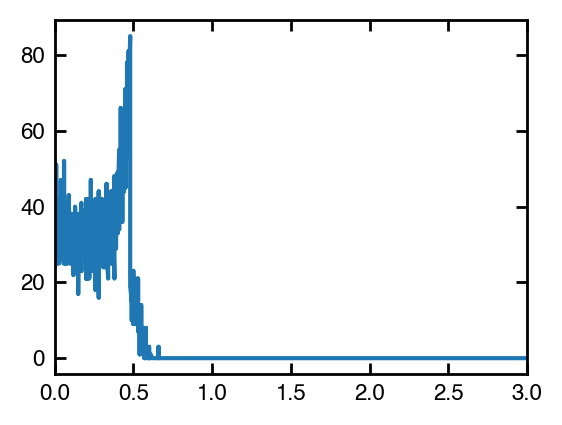

In [17]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 
plt.plot(bin_Sim_2in_Ch4_Cs137, Sim_2in_Ch4_Cs137 )
fig_post_def(xlim=(0,3))

simulation_x = bin_Sim_2in_Ch4_Cs137.copy()[0:1000]
simulation_y = Sim_2in_Ch4_Cs137.copy()[0:1000]
experiment_x = exp_2in_Ch4_Cs137_x.copy()
experiment_y = exp_2in_Ch4_Cs137_y_smoothed.copy()
compare_LO_LLD = 0.3
compare_LO_ULD = 0.8
simulation_x_binning = 1000
compare_LLD=int(compare_LO_LLD*simulation_x_binning)
compare_ULD=int(compare_LO_ULD*simulation_x_binning)
Ch_to_LO_value = 0.00035

output_result = [0,0,0,0]
experiment_y_rebin = interp1d(experiment_x*Ch_to_LO_value, experiment_y,fill_value="extrapolate")(simulation_x)
for alpha in np.arange(0.01,0.05,0.001):
    for beta in np.arange(0.01,0.05,0.001):
        for gamma in np.arange(0.01,0.05,0.001):
            broadened_distribution = resolution_function(simulation_x,simulation_y,alpha,beta,gamma)
            Final_output= (broadened_distribution[compare_LLD:compare_ULD]/broadened_distribution[compare_LLD:compare_ULD].max())-(experiment_y_rebin[compare_LLD:compare_ULD]/experiment_y_rebin[compare_LLD:compare_ULD].max())
            STD = sum(Final_output**2)
            output_result = np.vstack((output_result,[alpha,beta,gamma,STD]))
            print([alpha,beta,gamma,STD])

In [271]:
def gaussian(x, A,x0,sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
def resolution_function(input_x,input_y,alpha,beta,gamma):
    # Convert Channel to light output and re-binning

    # build the base for accumulating results
    broadened_distribution = np.zeros(len(input_x))

    for LO_i,osc_i in zip(input_x,input_y):
        FWHM = ((LO_i*alpha)**2+((beta**2)*LO_i)+(gamma)**2)**0.5
        if (LO_i*alpha)**2+(beta*LO_i)+(gamma)**2<=0:
            sigma =0
        else:
            sigma =  FWHM/2.355
            broadened_distribution_temp = gaussian(input_x,1,LO_i,sigma)
            broadened_distribution+= osc_i*broadened_distribution_temp
    return broadened_distribution

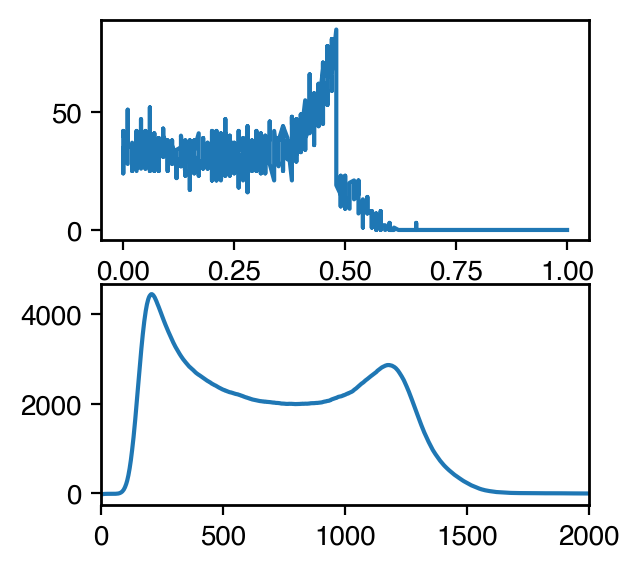

In [359]:
simulation_x = bin_Sim_2in_Ch4_Cs137.copy()[0:1000]
simulation_y = Sim_2in_Ch4_Cs137.copy()[0:1000]
experiment_x = exp_2in_Ch4_Cs137_x.copy()
experiment_y = (exp_2in_Ch4_Cs137_y_smoothed.copy())-exp_2in_Ch4_Cs137_y_smoothed[1750]
compare_LO_LLD = 7.5
compare_LO_ULD = 17.5
simulation_x_binning = 100
compare_LLD=int(compare_LO_LLD*simulation_x_binning)
compare_ULD=int(compare_LO_ULD*simulation_x_binning)
fig = fig_pre_def(8,8,1)# 圖片大小
ax1 = fig.add_subplot(2, 1, 1) 
ax1.plot(simulation_x,simulation_y)
ax2 = fig.add_subplot(2, 1, 2) 
ax2.plot(experiment_x,experiment_y)
plt.xlim(0,2000)

def min_function(input_parameters):
    global resolution_function,simulation_x,simulation_y,experiment_x,experiment_y,compare_LO_LLD,compare_LO_ULD,compare_LLD,compare_ULD
    resolution_result = resolution_function(simulation_x,simulation_y,input_parameters[1],input_parameters[2],input_parameters[3])
    resolution_result_y_rebin = interp1d(simulation_x*input_parameters[0], resolution_result,fill_value="extrapolate")(experiment_x)
    #print(resolution_result[compare_LLD:compare_ULD].max(),'  ',experiment_y_rebin[compare_LLD:compare_ULD].max())
    Final_output= (resolution_result_y_rebin[compare_LLD:compare_ULD]/resolution_result_y_rebin[compare_LLD:compare_ULD].max())-(experiment_y[compare_LLD:compare_ULD]/experiment_y[compare_LLD:compare_ULD].max())
    STD = sum(Final_output**2)
    #print(STD)
    return STD


    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


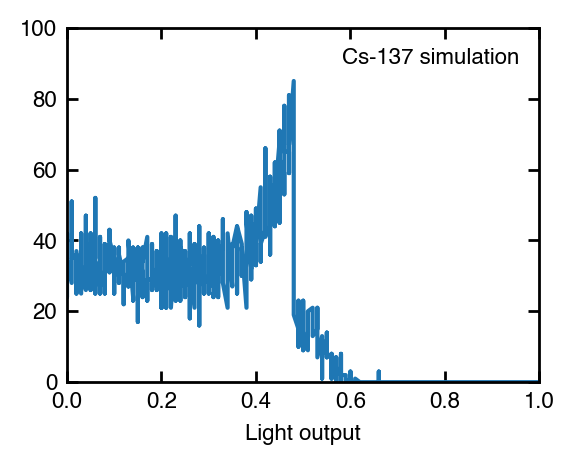

In [365]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 
ax.plot(simulation_x,simulation_y)
fig_post_def(xlim=(0,1),ylim=(0,100),title='Cs-137 simulation',lg_fs=8,xlabel='Light output')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


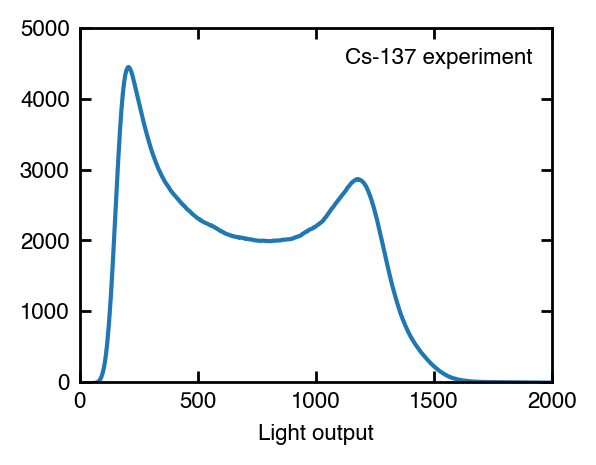

In [370]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 
ax.plot(experiment_x,experiment_y)
fig_post_def(xlim=(0,2000),ylim=(0,5000),title='Cs-137 experiment',lg_fs=8,xlabel='Light output')

In [320]:
initial_guess= [2650,0.01,0.01,0.01]
bnds = ((2650, 2750), (0, None), (0, None), (0, None))
output_result =minimize(min_function
                ,initial_guess
                ,bounds=bnds
                #,tol = 0.001
                #,options={'gtol': 0.001}
                , method='L-BFGS-B')
print(output_result)
print(output_result.message)

output_min = output_result.x


/opt/homebrew/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 1.3450395264863597
        x: [ 2.650e+03  0.000e+00  0.000e+00  6.410e-02]
      nit: 14
      jac: [ 3.578e-02  2.132e-06  2.665e-06 -6.217e-07]
     nfev: 90
     njev: 18
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL


In [717]:
[ 2.65111111e+03 -7.80481460e-02 -1.20293129e-02  8.55841668e-02]
[ 2.64994142e+03  9.05071337e-02 -1.35753630e-02  8.72445117e-02]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1761616774.py, line 1)

In [258]:
#output_min = [2650, 0.0328,0.0378,0.0328]

In [330]:
bin_Sim_2in_Ch4_Cs137_2, Sim_2in_Ch4_Cs137_2 =sorting(Sim_2in_Ch4_Cs137_raw,1000,0,10)

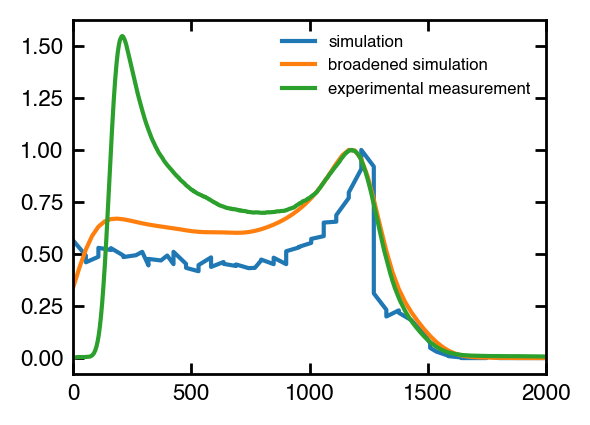

In [335]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

broadened_spectrum =  resolution_function(bin_Sim_2in_Ch4_Cs137, Sim_2in_Ch4_Cs137,output_min[1],output_min[2],output_min[3])

plt.plot(bin_Sim_2in_Ch4_Cs137_2*output_min[0],Sim_2in_Ch4_Cs137_2/Sim_2in_Ch4_Cs137_2.max(),label='simulation')

plt.plot(bin_Sim_2in_Ch4_Cs137*output_min[0],broadened_spectrum/broadened_spectrum[20:].max(),label='broadened simulation')

plt.plot(exp_2in_Ch4_Cs137_x,exp_2in_Ch4_Cs137_y_smoothed/exp_2in_Ch4_Cs137_y_smoothed[1000:].max(),label='experimental measurement')

fig_post_def(xlim=(0,2000))

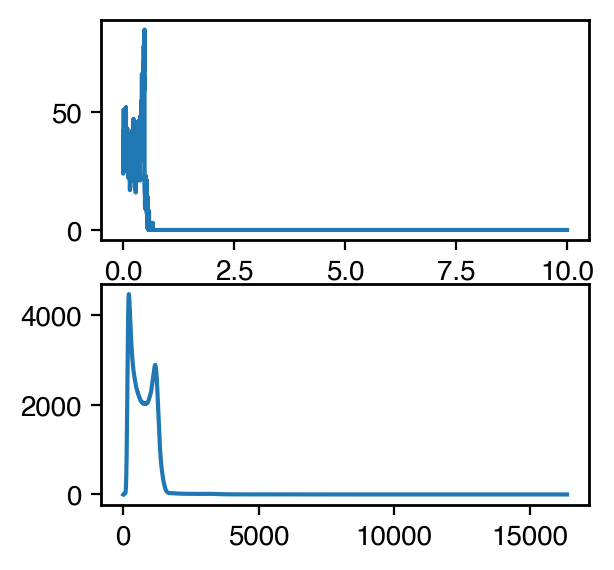

In [345]:
simulation_x = bin_Sim_2in_Ch4_Cs137.copy()
simulation_y = Sim_2in_Ch4_Cs137.copy()
experiment_x = exp_2in_Ch4_Cs137_x.copy()
experiment_y = exp_2in_Ch4_Cs137_y_smoothed.copy()
Ch_to_LO_value = 0.00035
compare_LO_LLD = 0.3
compare_LO_ULD = 0.6
simulation_x_binning = 1000
compare_LLD=int(compare_LO_LLD*simulation_x_binning)
compare_ULD=int(compare_LO_ULD*simulation_x_binning)
fig = fig_pre_def(8,8,1)# 圖片大小
ax1 = fig.add_subplot(2, 1, 1) 
ax1.plot(simulation_x,simulation_y)
ax2 = fig.add_subplot(2, 1, 2) 
ax2.plot(experiment_x,experiment_y)


def min_function_2(input_parameters):
    global resolution_function,simulation_x,simulation_y,experiment_x,experiment_y,compare_LO_LLD,compare_LO_ULD,Ch_to_LO_value
    resolution_result = resolution_function(simulation_x,simulation_y,input_parameters[0],input_parameters[1],input_parameters[2])
    experiment_y_rebin = interp1d(experiment_x*Ch_to_LO_value, experiment_y,fill_value="extrapolate")(simulation_x)
    print(Ch_to_LO_value)
    #print(resolution_result[compare_LLD:compare_ULD].max(),'  ',experiment_y_rebin[compare_LLD:compare_ULD].max())
    Final_output= (resolution_result[compare_LLD:compare_ULD]/resolution_result[compare_LLD:compare_ULD].max())-(experiment_y_rebin[compare_LLD:compare_ULD]/experiment_y_rebin[compare_LLD:compare_ULD].max())
    STD = sum(Final_output**2)
    print(STD)
    return STD


    

In [346]:
initial_guess= [0.01,0.01,0.01]
output_min =minimize(min_function_2,initial_guess).x
print(output_min)



0.00035
0.00035
0.00035
0.00035
0.00035


/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_5249/3879030790.py:10: RuntimeWarning: invalid value encountered in scalar power
  FWHM = ((LO_i*alpha)**2+(beta*LO_i)+(gamma)**2)**0.5


0.00035
0.00035
0.00035
0.00035
0.00035
0.00035
0.00035
0.00035


KeyboardInterrupt: 

In [347]:
min_function_2(initial_guess)
Ch_to_LO_value = 0.0004
min_function_2(initial_guess)


0.00035
0.0004


5.6690995883809965

/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_5249/3879030790.py:10: RuntimeWarning: invalid value encountered in scalar power
  FWHM = ((LO_i*alpha)**2+(beta*LO_i)+(gamma)**2)**0.5


(0.0, 1.0)

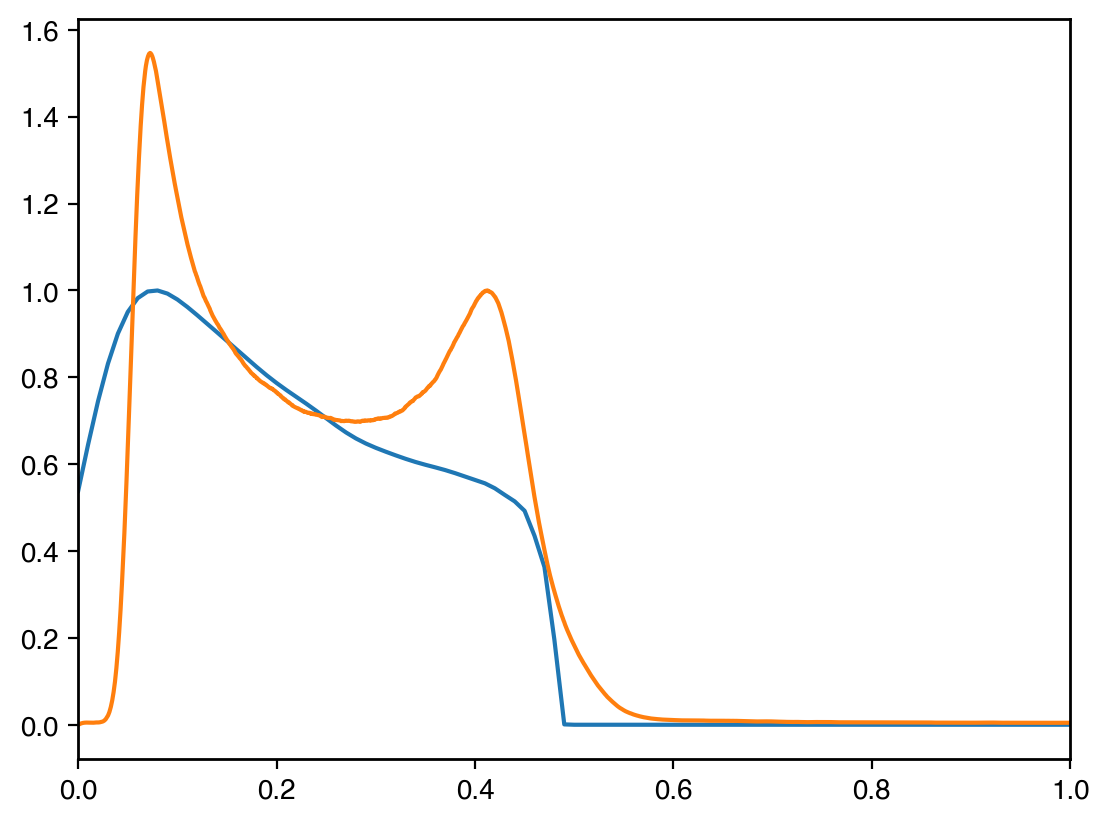

In [340]:
broadened_spectrum =  resolution_function(bin_Sim_2in_Ch4_Cs137, Sim_2in_Ch4_Cs137,output_min[0],output_min[1],output_min[2])
plt.plot(bin_Sim_2in_Ch4_Cs137,broadened_spectrum/broadened_spectrum[20:].max())

plt.plot(exp_2in_Ch4_Cs137_x*Ch_to_LO_value,exp_2in_Ch4_Cs137_y_smoothed/exp_2in_Ch4_Cs137_y_smoothed[1000:].max())

plt.xlim(0,1)

# Co-60

In [74]:
#Sim_2in_Cs137= np.loadtxt('')
exp_2in_Ch4_Co60_y   = np.loadtxt('../../../data/HV_calibration/HV1600-850/CH4@DT5730B_1173_Espectrum_20220217_Co60_Ch4_2in10cm_HV850_TH35_24hours_20230218_230101.txt')
Sim_2in_Ch4_Co60_raw = np.loadtxt('../../../data/HV_calibration/2023_EJ309_LO_Calibration/202302_2inches_EJ309_Co-60_isotropic_Energy_deposited.txt')



In [75]:
bin_Sim_2in_Ch4_Co60, Sim_2in_Ch4_Co60 =sorting(Sim_2in_Ch4_Co60_raw,1000,0,10)



In [76]:
del Sim_2in_Ch4_Co60_raw

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


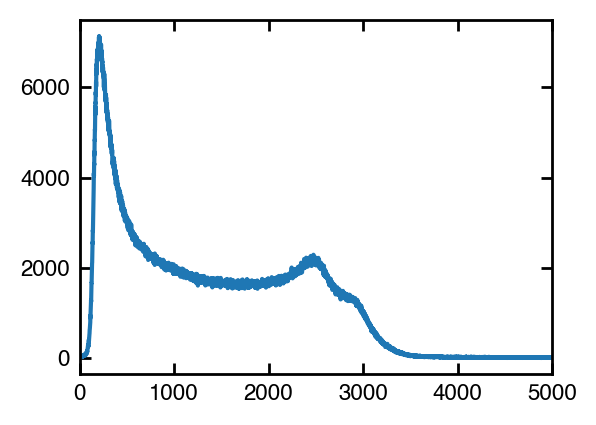

In [110]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

exp_2in_Ch4_Co60_x = np.arange(0,len(exp_2in_Ch4_Co60_y),1)
plt.plot(exp_2in_Ch4_Co60_x,exp_2in_Ch4_Co60_y)
fig_post_def(xlim=(0,5000))

(0.0, 5000.0)

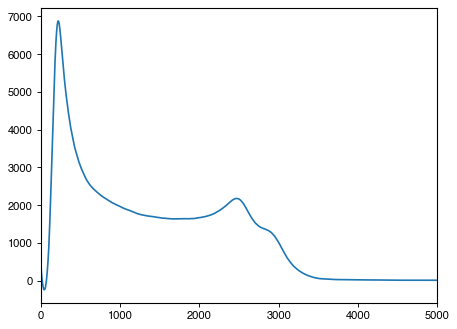

In [111]:
from scipy.signal import savgol_filter #Smooth
exp_2in_Ch4_Co60_y_smoothed = savgol_filter(exp_2in_Ch4_Co60_y, 201, 3) 

plt.plot(exp_2in_Ch4_Co60_x,exp_2in_Ch4_Co60_y_smoothed)
plt.xlim(0,5000)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


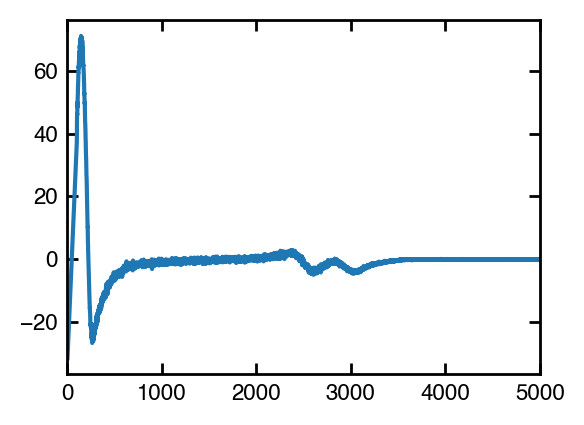

In [112]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

exp_2in_Ch4_Co60_y_smoothed_diff = np.diff(exp_2in_Ch4_Co60_y_smoothed, n=1)
plt.plot(exp_2in_Ch4_Co60_x[:-1],exp_2in_Ch4_Co60_y_smoothed_diff)
fig_post_def(xlim=(0,5000))


In [113]:
def gauss_wo_baseline(x,  A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
def gauss_fit_wo_baseline(x, y):  
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    try:  
        popt, pcov = curve_fit(gauss_wo_baseline, x, y, p0=[1, mean, sigma], maxfev=1000)
        return popt
    except RuntimeError:
        print("Error - curve_fit failed")
        return  [0,mean,sigma]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[  -3.88627054 2614.03268677  -84.0884261 ]


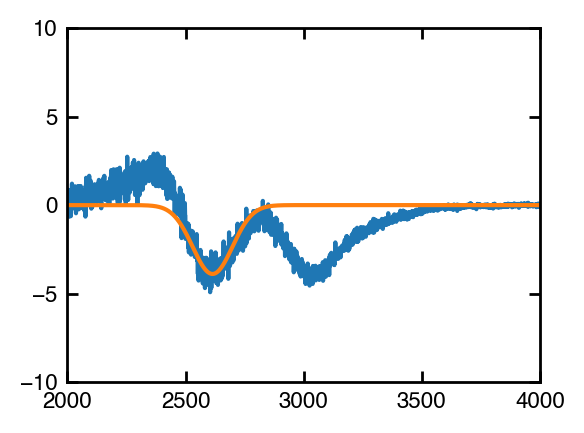

In [114]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

Co60_ROI=np.arange(2500,2700,1)
Co60_fitting_parameter_1 = gauss_fit_wo_baseline(exp_2in_Ch4_Co60_x[Co60_ROI],exp_2in_Ch4_Co60_y_smoothed_diff[Co60_ROI])
print(Co60_fitting_parameter_1)

plt.plot(exp_2in_Ch4_Co60_x[:-1],exp_2in_Ch4_Co60_y_smoothed_diff)
plt.plot(exp_2in_Ch4_Co60_x[:-1],gauss_wo_baseline(exp_2in_Ch4_Co60_x[:-1],Co60_fitting_parameter_1[0],Co60_fitting_parameter_1[1],Co60_fitting_parameter_1[2]))

fig_post_def(xlim=(2000,4000),ylim=(-10,10))

In [115]:
Co60_compton_edge_1 = compton_edge(1.173)
print(Co60_compton_edge_1)
print((Co60_fitting_parameter_1[1])/Co60_compton_edge_1)
print(Co60_compton_edge_1/(Co60_fitting_parameter_1[1]))

0.9631984599229961
2713.9087068048775
0.0003684722325008913


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[  -3.97870441 3040.80933314 -109.11463859]


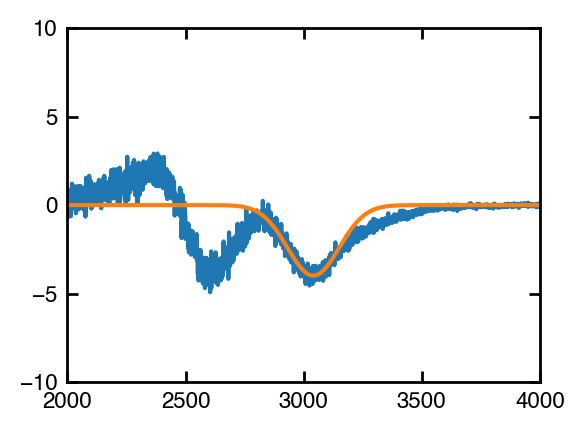

In [116]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

Co60_ROI=np.arange(2900,3100,1)
Co60_fitting_parameter_2 = gauss_fit_wo_baseline(exp_2in_Ch4_Co60_x[Co60_ROI],exp_2in_Ch4_Co60_y_smoothed_diff[Co60_ROI])
print(Co60_fitting_parameter_2)

plt.plot(exp_2in_Ch4_Co60_x[:-1],exp_2in_Ch4_Co60_y_smoothed_diff)
plt.plot(exp_2in_Ch4_Co60_x[:-1],gauss_wo_baseline(exp_2in_Ch4_Co60_x[:-1],Co60_fitting_parameter_2[0],Co60_fitting_parameter_2[1],Co60_fitting_parameter_2[2]))

fig_post_def(xlim=(2000,4000),ylim=(-10,10))

In [117]:
Co60_compton_edge_2 = compton_edge(1.332)
print(Co60_compton_edge_2)
print((Co60_fitting_parameter_2[1])/Co60_compton_edge_2)
print(Co60_compton_edge_2/(Co60_fitting_parameter_2[1]))

1.1176214173228347
2720.786561541994
0.00036754077447120816


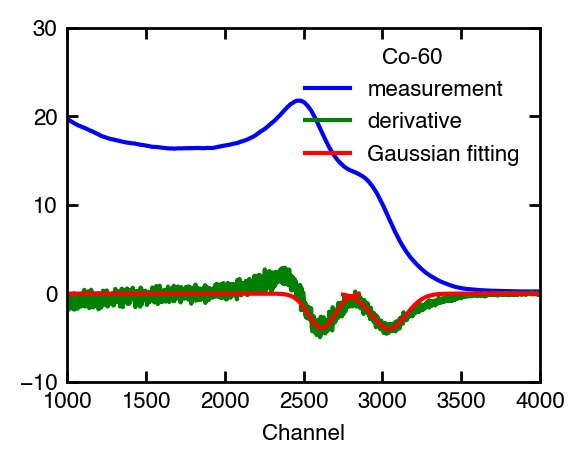

In [255]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 


plt.plot(exp_2in_Ch4_Co60_x,exp_2in_Ch4_Co60_y_smoothed/100,'b',label='measurement')
plt.plot(exp_2in_Ch4_Co60_x[:-1],exp_2in_Ch4_Co60_y_smoothed_diff,'g',label='derivative')

plt.plot(exp_2in_Ch4_Co60_x[:2850]
        ,gauss_wo_baseline(exp_2in_Ch4_Co60_x[:-1]
                            ,Co60_fitting_parameter_1[0]
                            ,Co60_fitting_parameter_1[1]
                            ,Co60_fitting_parameter_1[2])[:2850],'r',label='Gaussian fitting')

plt.plot(exp_2in_Ch4_Co60_x[2750:-1]
        ,gauss_wo_baseline(exp_2in_Ch4_Co60_x[:-1]
                            ,Co60_fitting_parameter_2[0]
                            ,Co60_fitting_parameter_2[1]
                            ,Co60_fitting_parameter_2[2])[2750:],'r')

fig_post_def(xlim=(1000,4000),ylim=(-10,30),title='Co-60',lg_fs=8,xlabel='Channel')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1000


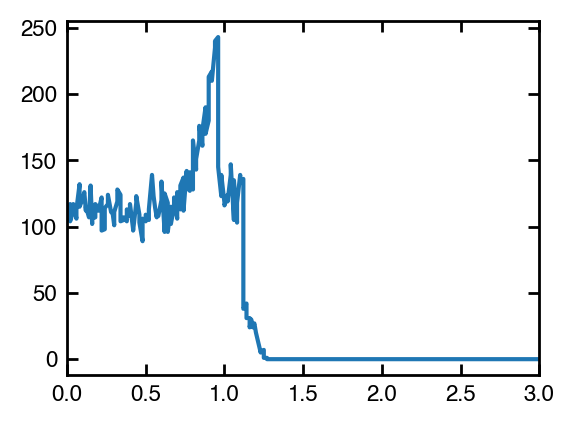

In [118]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 
plt.plot(bin_Sim_2in_Ch4_Co60, Sim_2in_Ch4_Co60 )
print(len(bin_Sim_2in_Ch4_Co60))

fig_post_def(xlim=(0,3))

In [371]:
def gaussian(x, A,x0,sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
def resolution_function(input_x,input_y,alpha,beta,gamma):
    # Convert Channel to light output and re-binning

    # build the base for accumulating results
    broadened_distribution = np.zeros(len(input_x))

    for LO_i,osc_i in zip(input_x,input_y):
        FWHM = ((LO_i*alpha)**2+(beta**2*LO_i)+(gamma)**2)**0.5
        if (LO_i*alpha)**2+(beta*LO_i)+(gamma)**2<=0:
            sigma =0
        else:
            sigma =  FWHM/2.355
            broadened_distribution_temp = gaussian(input_x,1,LO_i,sigma)
            broadened_distribution+= osc_i*broadened_distribution_temp
    return broadened_distribution

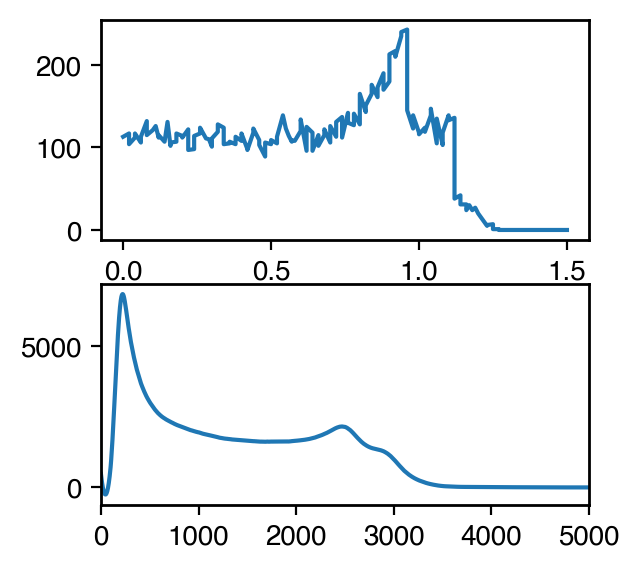

In [381]:
simulation_x = bin_Sim_2in_Ch4_Co60.copy()[0:150]
simulation_y = Sim_2in_Ch4_Co60.copy()[0:150]
experiment_x = exp_2in_Ch4_Co60_x.copy()
experiment_y = (exp_2in_Ch4_Co60_y_smoothed.copy())-exp_2in_Ch4_Co60_y_smoothed[4000]
compare_LO_LLD = 2.0
compare_LO_ULD = 3.5
simulation_x_binning = 1000
compare_LLD=int(compare_LO_LLD*simulation_x_binning)
compare_ULD=int(compare_LO_ULD*simulation_x_binning)
fig = fig_pre_def(8,8,1)# 圖片大小
ax1 = fig.add_subplot(2, 1, 1) 
ax1.plot(simulation_x,simulation_y)
ax2 = fig.add_subplot(2, 1, 2) 
ax2.plot(experiment_x,experiment_y)
plt.xlim(0,5000)

def min_function(input_parameters):
    global resolution_function,simulation_x,simulation_y,experiment_x,experiment_y,compare_LLD,compare_ULD
    resolution_result = resolution_function(simulation_x,simulation_y,input_parameters[1],input_parameters[2],input_parameters[3])
    resolution_result_y_rebin = interp1d(simulation_x*input_parameters[0], resolution_result,fill_value="extrapolate")(experiment_x)
    #print(resolution_result[compare_LLD:compare_ULD].max(),'  ',experiment_y_rebin[compare_LLD:compare_ULD].max())
    Final_output= (resolution_result_y_rebin[compare_LLD:compare_ULD]/resolution_result_y_rebin[compare_LLD:compare_ULD].max())-(experiment_y[compare_LLD:compare_ULD]/experiment_y[compare_LLD:compare_ULD].max())
    STD = sum(Final_output**2)
    #print(STD)
    return STD


    

In [382]:
initial_guess= [2700,0.005,0.005,0.005]
bnds = ((2650, 2750), (0, 0.1), (0, 0.1), (0, 0.1))
output_result =minimize(min_function
                ,initial_guess
                #,bounds=bnds
                #,tol = 0.001
                #,options={'gtol': 0.001}
                , method='BFGS')
print(output_result)
print(output_result.message)

output_min = output_result.x


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1.4081746403981807
        x: [ 2.699e+03 -1.481e-03 -6.879e-03  1.011e-01]
      nit: 12
      jac: [ 3.687e-02 -8.615e-01 -2.194e+00 -2.984e+00]
 hess_inv: [[ 9.498e+01  9.721e-02  3.954e-01  1.720e-02]
            [ 9.721e-02  1.509e-03 -8.906e-05  2.231e-05]
            [ 3.954e-01 -8.906e-05  2.771e-03 -1.526e-04]
            [ 1.720e-02  2.231e-05 -1.526e-04  2.688e-04]]
     nfev: 462
     njev: 91
Desired error not necessarily achieved due to precision loss.


In [374]:
2.649e+03  3.084e-06 -6.873e-03  7.856e-02

SyntaxError: invalid syntax (2264123003.py, line 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


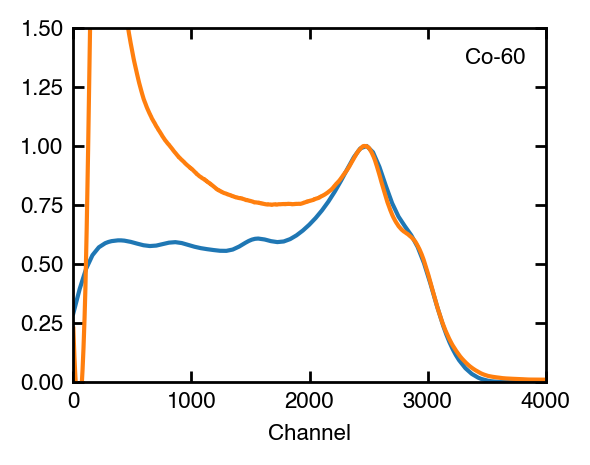

In [388]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 
broadened_spectrum =  resolution_function(bin_Sim_2in_Ch4_Co60, Sim_2in_Ch4_Co60,output_min[1],output_min[2],output_min[3])
plt.plot(bin_Sim_2in_Ch4_Co60*output_min[0],broadened_spectrum/broadened_spectrum[50:].max())

plt.plot(exp_2in_Ch4_Co60_x,exp_2in_Ch4_Co60_y_smoothed/exp_2in_Ch4_Co60_y_smoothed[2000:].max())

fig_post_def(xlim=(0,4000),ylim=(0,1.5),title='Co-60',lg_fs=8,xlabel='Channel')

In [122]:
x1=[(Cs137_fitting_parameter[1],compton_edge(0.662))
,(Co60_fitting_parameter_1[1],compton_edge(1.173))
,(Co60_fitting_parameter_2[1],compton_edge(1.332))]

In [219]:
x1= np.array([Cs137_fitting_parameter[1],Co60_fitting_parameter_1[1],Co60_fitting_parameter_2[1]]).reshape(1, -1)
y1= np.array([compton_edge(0.662),compton_edge(1.173),compton_edge(1.332)]).reshape(1, -1)

In [378]:
print(x1)
print(y1)

[1275.49691049 2614.03268677 3040.80933314]
[0.47765014 0.96319846 1.11762142]


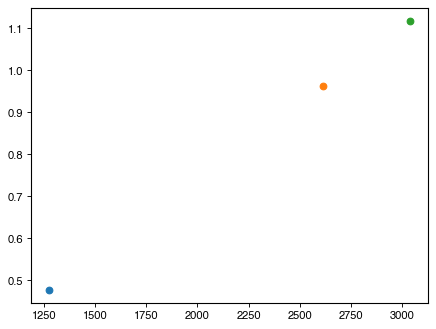

In [221]:
plt.plot(x1,y1,'o-')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


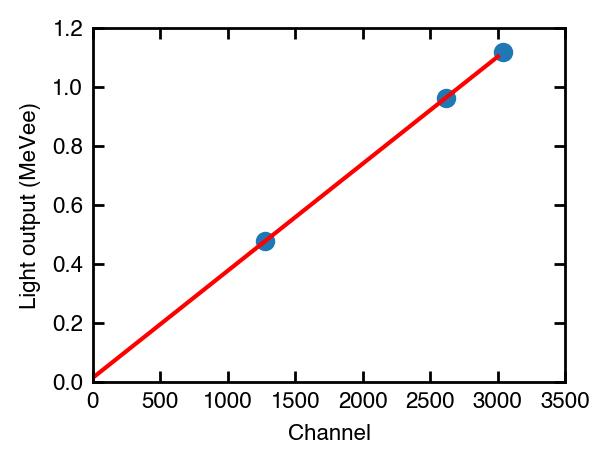

In [389]:
model = LinearRegression(fit_intercept=True)
x1= np.array([Cs137_fitting_parameter[1],Co60_fitting_parameter_1[1],Co60_fitting_parameter_2[1]])
y1= np.array([compton_edge(0.662),compton_edge(1.173),compton_edge(1.332)])
model.fit(x1[:, np.newaxis], y1)

xfit = np.linspace(0, 3000, 100)
yfit = model.predict(xfit[:, np.newaxis])
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(2, 1, 1) 
plt.scatter(x1, y1)
ax.plot(xfit, yfit,'r')
fig_post_def(xlim=(0,3500),ylim=(0,1.2),xlabel='Channel',ylabel='Light output (MeVee)')

In [231]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     0.000362578556798934
Model intercept: 0.015225908657818699


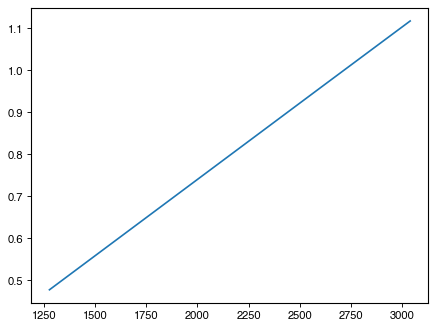

In [213]:
plt.plot(x1[0,:],model.predict(x1)[0,:])
#plt.scatter(x1,y1)
#plt.show()

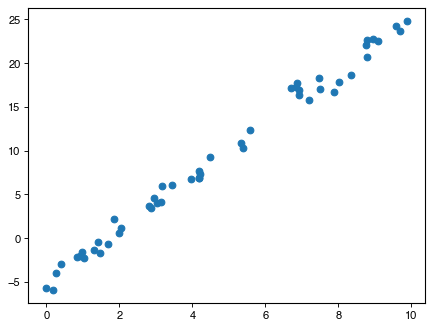

In [225]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 3 * x - 5 + rng.randn(50)
plt.scatter(x, y);

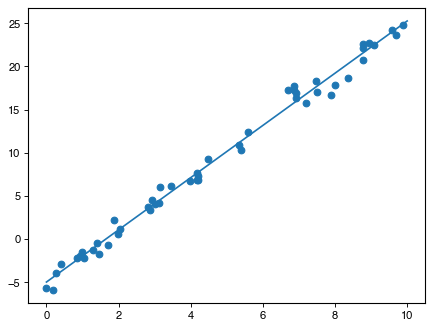

In [226]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [227]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     3.027208810360695
Model intercept: -4.998577085553201


In [154]:
from sklearn import datasets

In [155]:
X,y = datasets.make_regression(n_samples=200,n_features=1,n_targets=1,noise=10)

[[-3.10929963e-01]
 [-2.02909114e+00]
 [-7.16294529e-01]
 [-4.67930713e-01]
 [-1.35366689e+00]
 [ 7.34069453e-01]
 [-5.65698203e-01]
 [ 4.61208775e-01]
 [ 1.20817475e+00]
 [ 3.40302492e-01]
 [-1.49495926e-01]
 [-3.01339628e-01]
 [ 8.25381851e-01]
 [-7.90623872e-01]
 [-2.12126952e-01]
 [ 1.73214876e+00]
 [-6.75359141e-01]
 [-1.31967436e+00]
 [-8.83399347e-01]
 [ 4.71421361e-01]
 [ 6.71703926e-01]
 [ 1.35451346e+00]
 [ 1.40562587e+00]
 [-8.77953831e-02]
 [-1.25105546e+00]
 [-7.34736809e-01]
 [ 8.44259061e-01]
 [-8.10878313e-01]
 [ 1.21974450e+00]
 [-2.90000029e-01]
 [-7.83859376e-01]
 [-5.10858539e-01]
 [-6.51350062e-02]
 [-4.97070013e-01]
 [ 1.40384580e+00]
 [ 6.74139773e-01]
 [-6.63840991e-01]
 [ 6.09269473e-01]
 [ 1.19210510e+00]
 [-1.53835069e+00]
 [ 8.76047407e-01]
 [ 2.43959629e+00]
 [-1.97241772e+00]
 [-1.43344859e+00]
 [-1.54015910e+00]
 [-1.72711442e+00]
 [-1.80990733e-01]
 [ 1.11227894e-01]
 [ 1.84444355e+00]
 [-6.13977886e-01]
 [ 1.28661740e+00]
 [-9.03430135e-03]
 [-2.1889323

In [234]:
#Sim_2in_Cs137= np.loadtxt('')
exp_2in_Ch4_Co60_y = np.loadtxt('../../../data/HV_calibration/HV1600-850/CH4@DT5730B_1173_Espectrum_20220214_Co60_Ch0_3in30cm_HV1600_Ch4_2in30cm_Ch6_2in30cmHV850_TH35_24hours_20230215_142605.txt')
Sim_2in_Ch4_Co60_raw = np.loadtxt('../../../data/HV_calibration/2023_EJ309_LO_Calibration/202302_2inches_EJ309_Co-60_isotropic_Energy_deposited.txt')



In [235]:
bin_Sim_2in_Ch4_Co60, Sim_2in_Ch4_Co60 =sorting(Sim_2in_Ch4_Co60_raw,1000,0,10)



In [236]:
del Sim_2in_Ch4_Co60_raw

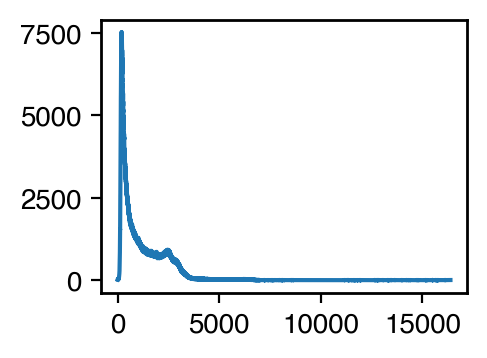

In [237]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

exp_2in_Ch4_Co60_x = np.arange(0,len(exp_2in_Ch4_Co60_y),1)
plt.plot(exp_2in_Ch4_Co60_x,exp_2in_Ch4_Co60_y)
#fig_post_def(xlim=(0,3))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


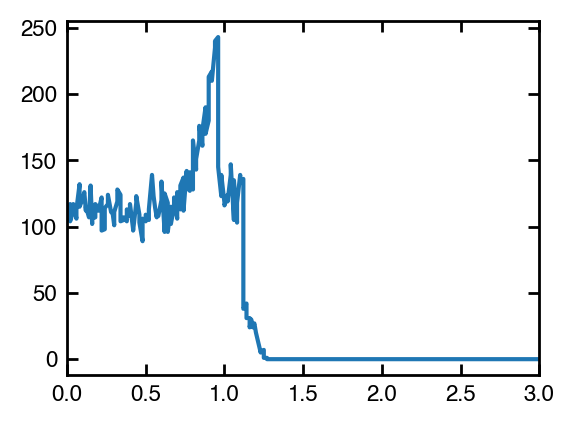

In [238]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 
plt.plot(bin_Sim_2in_Ch4_Co60, Sim_2in_Ch4_Co60)
fig_post_def(xlim=(0,3))

In [260]:
def gaussian(x, A,x0,sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
def resolution_function(input_x,input_y,alpha,beta,gamma):
    # Convert Channel to light output and re-binning

    # build the base for accumulating results
    broadened_distribution = np.zeros(len(input_x))

    for LO_i,osc_i in zip(input_x,input_y):
        FWHM = ((LO_i*alpha)**2+(beta**2*LO_i)+(gamma)**2)**0.5
        if (LO_i*alpha)**2+(beta*LO_i)+(gamma)**2<=0:
            sigma =0
        else:
            sigma =  FWHM/2.355
            broadened_distribution_temp = gaussian(input_x,1,LO_i,sigma)
            broadened_distribution+= osc_i*broadened_distribution_temp
    return broadened_distribution

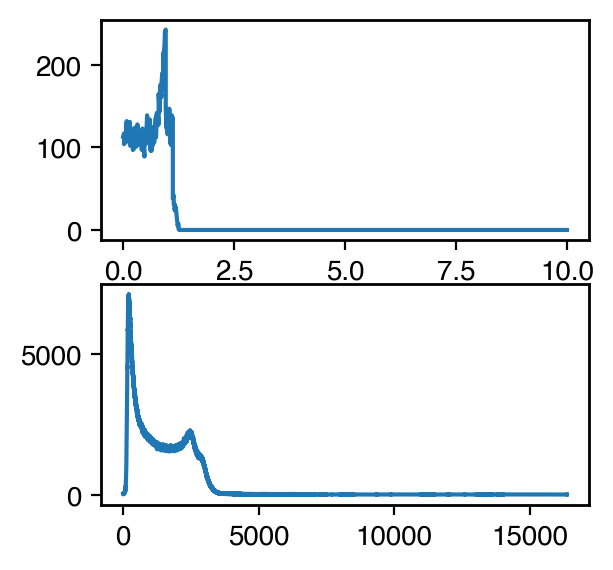

In [261]:
simulation_x = bin_Sim_2in_Ch4_Co60.copy()
simulation_y = Sim_2in_Ch4_Co60.copy()
experiment_x = exp_2in_Ch4_Co60_x.copy()
experiment_y = exp_2in_Ch4_Co60_y.copy()
compare_LO_LLD = 0.5
compare_LO_ULD = 1.5
simulation_x_binning = 100
compare_LLD=int(compare_LO_LLD*simulation_x_binning)
compare_ULD=int(compare_LO_ULD*simulation_x_binning)
fig = fig_pre_def(8,8,1)# 圖片大小
ax1 = fig.add_subplot(2, 1, 1) 
ax1.plot(simulation_x,simulation_y)
ax2 = fig.add_subplot(2, 1, 2) 
ax2.plot(experiment_x,experiment_y)


def min_function(input_parameters):
    global resolution_function,simulation_x,simulation_y,experiment_x,experiment_y,compare_LO_LLD,compare_LO_ULD
    resolution_result = resolution_function(simulation_x,simulation_y,input_parameters[1],input_parameters[2],input_parameters[3])
    experiment_y_rebin = interp1d(experiment_x*input_parameters[0], experiment_y,fill_value="extrapolate")(simulation_x)
    #print(resolution_result[compare_LLD:compare_ULD].max(),'  ',experiment_y_rebin[compare_LLD:compare_ULD].max())
    Final_output= (resolution_result[compare_LLD:compare_ULD]/resolution_result[compare_LLD:compare_ULD].max())-(experiment_y_rebin[compare_LLD:compare_ULD]/experiment_y_rebin[compare_LLD:compare_ULD].max())
    #print(Final_output)
    STD = sum(Final_output**2)
    return STD


    

In [246]:
initial_guess= [0.0004,0.01 ,0.01 ,0.01]
output_min =minimize(min_function,initial_guess,method="L-BFGS-B").x
print(output_min)



[0.00036363 0.01       0.01       0.01      ]


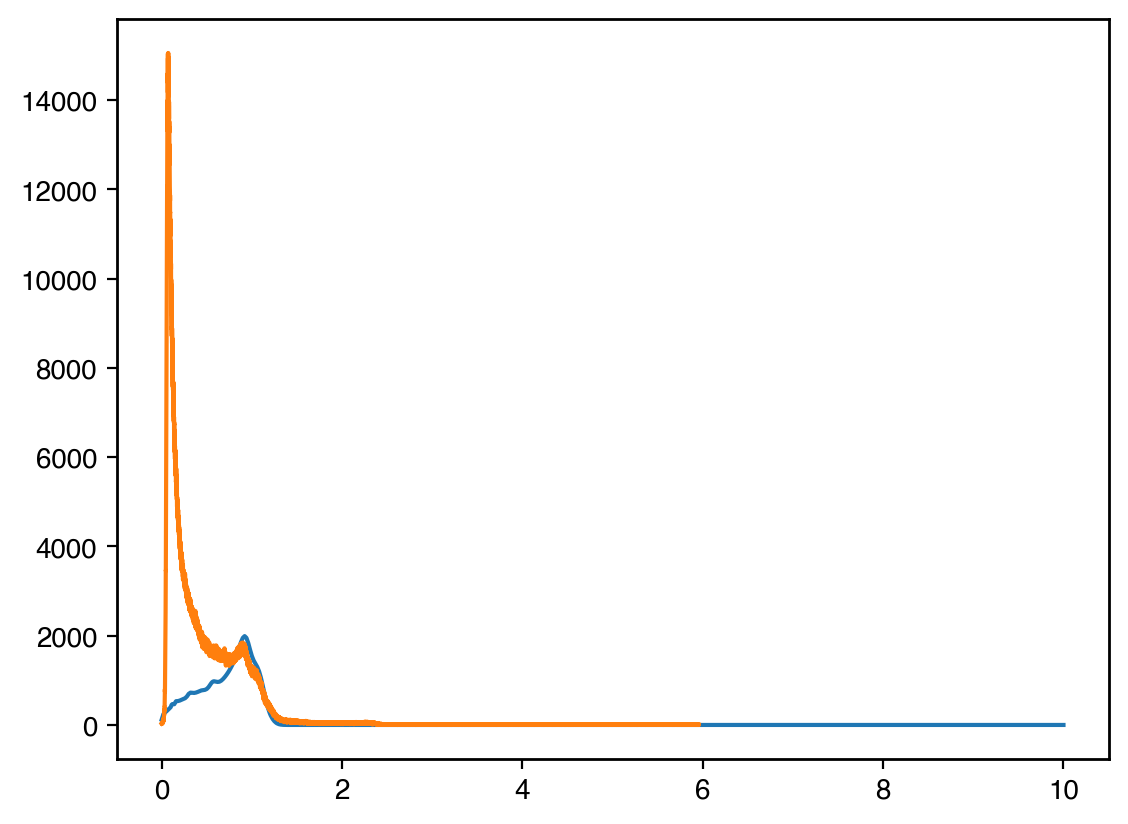

In [247]:
broadened_spectrum =  resolution_function(bin_Sim_2in_Ch4_Co60,Sim_2in_Ch4_Co60,output_min[1],output_min[2],output_min[3])
plt.plot(bin_Sim_2in_Ch4_Co60,broadened_spectrum)

plt.plot(exp_2in_Ch4_Co60_x*output_min[0],exp_2in_Ch4_Co60_y*2)

 

In [175]:
def gaussian(x, A,x0,sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
def resolution_function(input_x,input_y,alpha,beta,gamma):
    # Convert Channel to light output and re-binning

    # build the base for accumulating results
    broadened_distribution = np.zeros(len(input_x))

    for LO_i,osc_i in zip(input_x,input_y):
        FWHM = ((LO_i*alpha)**2+(beta*LO_i)+(gamma)**2)**0.5
        if (LO_i*alpha)**2+(beta*LO_i)+(gamma)**2<=0:
            sigma =0
        else:
            sigma =  FWHM/2.355
            broadened_distribution_temp = gaussian(input_x,1,LO_i,sigma)
            broadened_distribution+= osc_i*broadened_distribution_temp
    return broadened_distribution

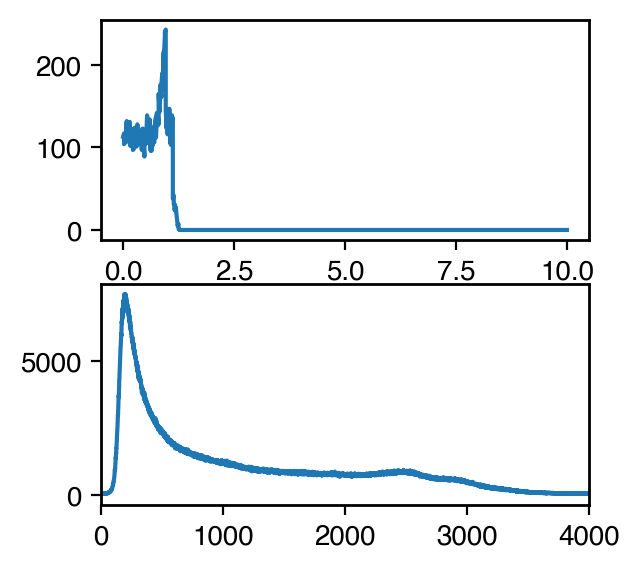

In [176]:
simulation_x = bin_Sim_2in_Ch4_Co60.copy()
simulation_y = Sim_2in_Ch4_Co60.copy()
experiment_x = exp_2in_Ch4_Co60_x.copy()
experiment_y = exp_2in_Ch4_Co60_y.copy()
compare_LO_LLD = 20
compare_LO_ULD = 40
simulation_x_binning = 100
compare_LLD=int(compare_LO_LLD*simulation_x_binning)
compare_ULD=int(compare_LO_ULD*simulation_x_binning)
fig = fig_pre_def(8,8,1)# 圖片大小
ax1 = fig.add_subplot(2, 1, 1) 
ax1.plot(simulation_x,simulation_y)
ax2 = fig.add_subplot(2, 1, 2) 
ax2.plot(experiment_x,experiment_y)
plt.xlim(0,4000)

def min_function(input_parameters):
    global resolution_function,simulation_x,simulation_y,experiment_x,experiment_y
    resolution_result = resolution_function(simulation_x,simulation_y,input_parameters[1],input_parameters[2],input_parameters[3])
    resolution_result_rebin = interp1d(simulation_x*input_parameters[0], resolution_result,fill_value="extrapolate")(experiment_x)
    #print(resolution_result[compare_LLD:compare_ULD].max(),'  ',experiment_y_rebin[compare_LLD:compare_ULD].max())
    Final_output= (resolution_result_rebin[compare_LLD:compare_ULD]/resolution_result_rebin[compare_LLD:compare_ULD].max())-(experiment_y[compare_LLD:compare_ULD]/experiment_y[compare_LLD:compare_ULD].max())
    #print(Final_output)
    STD = sum(Final_output**2)
    return STD


    

In [181]:
initial_guess= [1/0.0003,0.01 ,0.01 ,0.01]
output_min =minimize(min_function,initial_guess,method="L-BFGS-B").x
print(output_min)



[ 3.33332825e+03 -1.06245268e+00 -2.09572863e+01  4.81935765e-01]


/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_5249/3879030790.py:10: RuntimeWarning: invalid value encountered in scalar power
  FWHM = ((LO_i*alpha)**2+(beta*LO_i)+(gamma)**2)**0.5
/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_5249/619355913.py:22: RuntimeWarning: invalid value encountered in divide
  Final_output= (resolution_result_rebin[compare_LLD:compare_ULD]/resolution_result_rebin[compare_LLD:compare_ULD].max())-(experiment_y[compare_LLD:compare_ULD]/experiment_y[compare_LLD:compare_ULD].max())


/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_5249/3879030790.py:10: RuntimeWarning: invalid value encountered in scalar power
  FWHM = ((LO_i*alpha)**2+(beta*LO_i)+(gamma)**2)**0.5


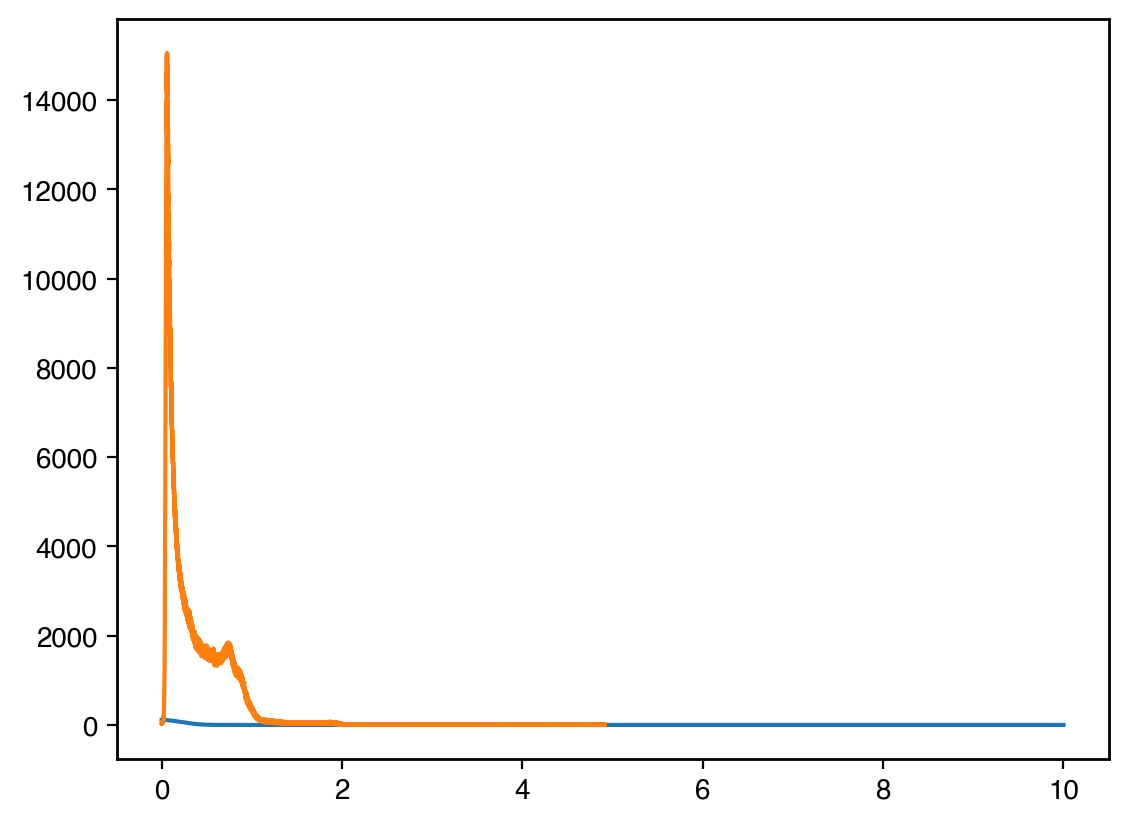

In [182]:
broadened_spectrum =  resolution_function(bin_Sim_2in_Ch4_Co60,Sim_2in_Ch4_Co60,output_min[1],output_min[2],output_min[3])
plt.plot(bin_Sim_2in_Ch4_Co60,broadened_spectrum)

plt.plot(exp_2in_Ch4_Co60_x/output_min[0],exp_2in_Ch4_Co60_y*2)

 

(0.0, 500.0)

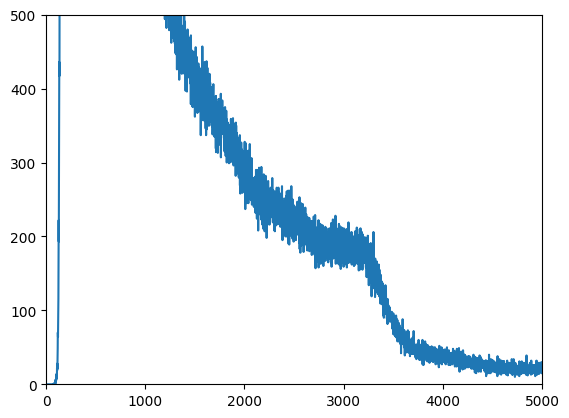

In [69]:
x_axis =np.arange(0,len(Ch4_Cs_137_data),1)

#plt.plot(x_axis,Ch4_Cs_137_data)

plt.plot(x_axis,Ch4_Co60_data)
plt.xlim(0,5000)
plt.ylim(0,500)

#  Smooth the Curve

(0.0, 4000.0)

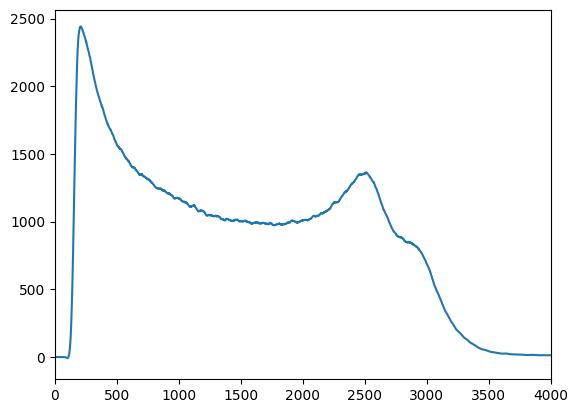

In [8]:
Ch0_smoothed = savgol_filter(Ch4_data, 71, 3) 

plt.plot(x_axis,Ch0_smoothed)
plt.xlim(0,4000)

[1357.9180806  2481.73981627  263.66184999]
2776.2501027097956


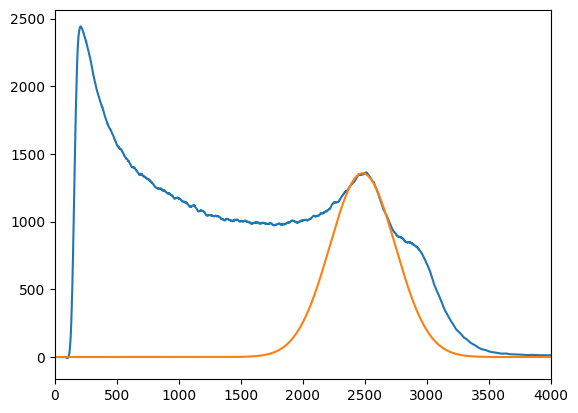

In [52]:
popt=gauss_fit_wo_baseline(x_axis[2450:2700],Ch0_smoothed[2450:2700])
print(popt)
plt.plot(x_axis,Ch0_smoothed)
plt.xlim(0,4000)
plt.plot(x_axis,gauss_wo_baseline(x_axis,popt[0],popt[1],popt[2]))
compton_edge_1173 = popt[1]+1.117*popt[2]
print(compton_edge_1173)

[ 869.82652348 2819.14143371  249.79796048]
3098.1657555595516


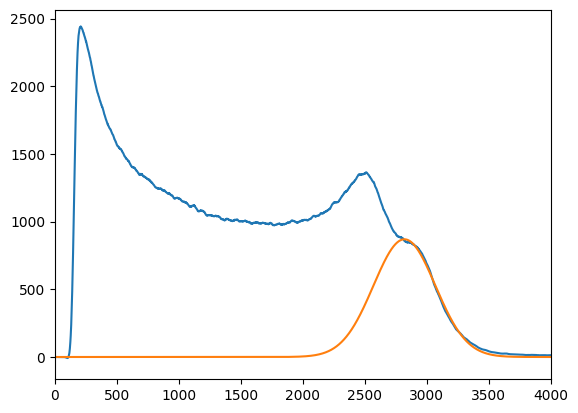

In [46]:
popt=gauss_fit_wo_baseline(x_axis[2800:3500],Ch0_smoothed[2800:3500])
print(popt)
plt.plot(x_axis,Ch0_smoothed)
plt.xlim(0,4000)
plt.plot(x_axis,gauss_wo_baseline(x_axis,popt[0],popt[1],popt[2]))
compton_edge_1332 = popt[1]+1.117*popt[2]
print(compton_edge_1332)

(-20.0, 10.0)

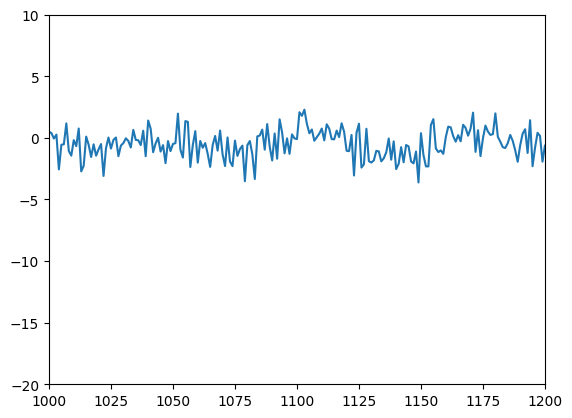

In [9]:
Ch0_diff = np.diff(Ch0_smoothed, n=1)
plt.plot(x_axis[:-1],Ch0_diff)
plt.xlim(1000,1200)
plt.ylim(-20,10)

(-20.0, 10.0)

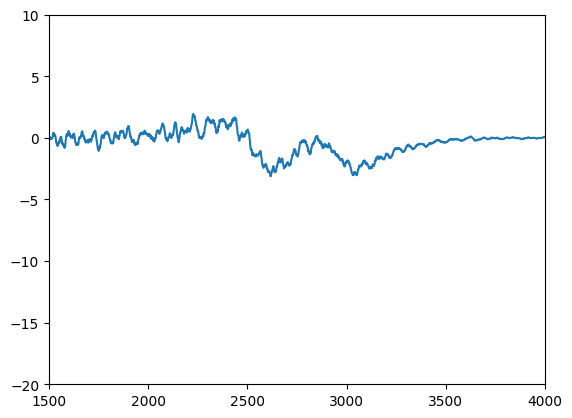

In [16]:
Ch0_diff_smoothed = savgol_filter(Ch0_diff, 31, 3) 

plt.plot(x_axis[:-1],Ch0_diff_smoothed)
plt.xlim(1500,4000)
plt.ylim(-20,10)


In [17]:
2324, 2692

(2324, 2692)

In [18]:
print(np.min(Ch0_diff_smoothed[2000:3000]))
print(np.argmin(Ch0_diff_smoothed[2400:2700]))
print(np.argmin(Ch0_diff_smoothed[2700:3000]))

-3.1056174806614645
216
289


In [74]:
print(2317*1.332/1.173)

2631.0690537084397


In [53]:
#1.173
0.817/2776

0.00029430835734870316

In [47]:
#1.332
0.9626/3098

0.0003107165913492576

In [81]:
#0.662
0.3736/1097

0.0003405651777575205

In [10]:
Ch0_diff = np.diff(Ch0_data, n=1)
plt.plot(x_axis[:-1],Ch0_diff)

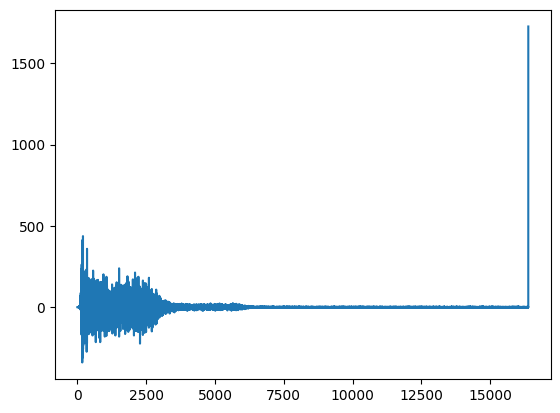

In [ ]:
PSD54 = np.loadtxt('3in_PSD_20221021_TH3535_ch0_3inches_54ns_HV1550_d30cm_Ch2_2inches_54ns_30cm_HV800.txt')
PSD60 = np.loadtxt('3in_PSD_20221021_TH3535_ch0_3inches_60ns_HV1550_d30cm_Ch2_2inches_60ns_30cm_HV800.txt')
PSD68 = np.loadtxt('3in_PSD_20221021_TH3535_ch0_3inches_68ns_HV1550_d30cm_Ch2_2inches_68ns_30cm_HV800_.txt')
PSD70 = np.loadtxt('3in_PSD_20221022_TH3535_ch0_3inches_70ns_HV1550_d30cm_Ch2_2inches_70ns_30cm_HV800.txt')
PSD74 = np.loadtxt('3in_PSD_20221022_TH3535_ch0_3inches_74ns_HV1550_d30cm_Ch2_2inches_74ns_30cm_HV800.txt')
PSD80 = np.loadtxt('3in_PSD_20221022_TH3535_ch0_3inches_80ns_HV1550_d30cm_Ch2_2inches_80ns_30cm_HV800.txt')
PSD84 = np.loadtxt('3in_PSD_20221022_TH3535_ch0_3inches_84ns_HV1550_d30cm_Ch2_2inches_84ns_30cm_HV800.txt')
PSD88 = np.loadtxt('3in_PSD_20221022_TH3535_ch0_3inches_88ns_HV1550_d30cm_Ch2_2inches_88ns_30cm_HV800.txt')
PSD92 = np.loadtxt('3in_PSD_20221022_TH3535_ch0_3inches_92ns_HV1550_d30cm_Ch2_2inches_92ns_30cm_HV800.txt')
PSD96 = np.loadtxt('3in_PSD_20221022_TH3535_ch0_3inches_96ns_HV1550_d30cm_Ch2_2inches_96ns_30cm_HV800.txt')

OSError: 3in_PSD_20221021_TH3535_ch0_3inches_54ns_HV1550_d30cm_Ch2_2inches_54ns_30cm_HV800.txt not found.

In [ ]:
for i in [60,62,64,66,68,70]:
    print(i)
    globals()["PSD"+str(i)]= np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221022_TH3535_ch0_3inches_'+str(i)+'ns_HV1550_d30cm_Ch2_2inches_'+str(i)+'ns_30cm_HV800.txt')

60
62
64
66
68
70


In [ ]:
#PSD68 = np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221022_TH3535_ch0_3inches_68ns_HV1550_d30cm_Ch2_2inches_68ns_30cm_HV800_.txt')
PSD68 = np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221022_TH3535_ch0_3inches_68ns_HV1550_d30cm_Ch2_2inches_68ns_30cm_HV800_2.txt')




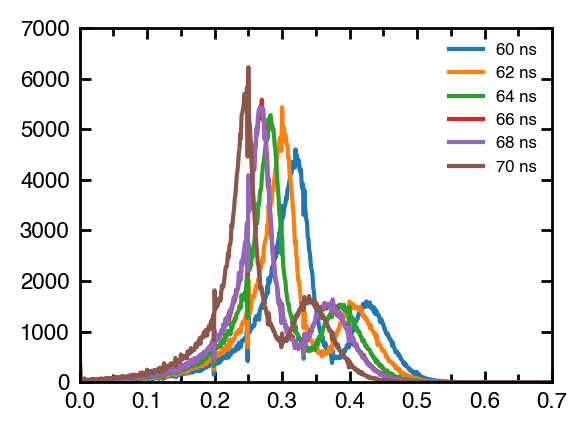

In [ ]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)
xaxis=np.arange(0,1,0.001)

ax.plot(xaxis,PSD60,label = '60 ns')
ax.plot(xaxis,PSD62,label = '62 ns')
ax.plot(xaxis,PSD64,label = '64 ns')
ax.plot(xaxis,PSD66,label = '66 ns')
ax.plot(xaxis,PSD68,label = '68 ns')
ax.plot(xaxis,PSD70,label = '70 ns')
#ax.plot(xaxis,PSD74,label = '74 ns')
#ax.plot(xaxis,PSD80,label = '80 ns')
#ax.plot(xaxis,PSD84,label = '84 ns')
#ax.plot(xaxis,PSD88,label = '88 ns')
#ax.plot(xaxis,PSD92,label = '92 ns')
#ax.plot(xaxis,PSD96,label = '96 ns')
fig_post_def(xlim=(0,0.7),ylim=(0,7000),xticks=(0.1,0.05))

In [ ]:
from scipy.optimize import curve_fit,fmin

def gauss_wo_baseline(x,  A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gaussian_fit(x,y) :  
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))  
    popt, pcov = curve_fit(gauss_wo_baseline, x, y, p0=[1, mean, sigma], maxfev=1000)
    return popt
    print('Fitting Finished')

A, x0, sigma:  [4.34561516e+03 3.17601087e-01 2.29756488e-02]
A, x0, sigma:  [1.48499444e+03 4.28370621e-01 3.09812979e-02]
FOM_60=  0.8717967418709214


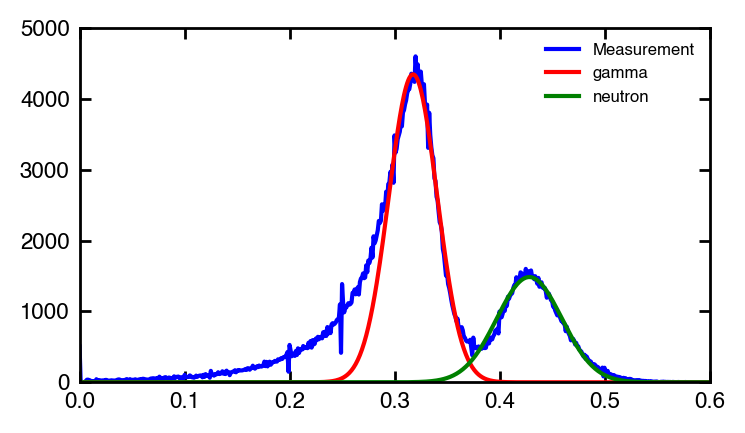

In [ ]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

plt.plot(xaxis,PSD60,'b',label='Measurement')
ragne_60_1=np.arange(290,360,1)
ga_60_para_1 = gaussian_fit(xaxis[ragne_60_1],PSD60[ragne_60_1])
print("A, x0, sigma: ",ga_60_para_1)
ga_60_1 = gauss_wo_baseline(xaxis,ga_60_para_1[0],ga_60_para_1[1],ga_60_para_1[2])
plt.plot(xaxis,ga_60_1,'r',label='gamma')

ragne_60_2=np.arange(400,600,1)
ga_60_para_2 = gaussian_fit(xaxis[ragne_60_2],PSD60[ragne_60_2])
print("A, x0, sigma: ",ga_60_para_2)
ga_60_2 = gauss_wo_baseline(xaxis,ga_60_para_2[0],ga_60_para_2[1],ga_60_para_2[2])
plt.plot(xaxis,ga_60_2,'g',label='neutron')

fig_post_def(xlim=(0,0.6),ylim=(0,5000))
FOM_60 = abs(ga_60_para_2[1]-ga_60_para_1[1])/((2*(2*np.log(2))**0.5)*(ga_60_para_2[2]+ga_60_para_1[2]))
print("FOM_60= ",FOM_60)

A, x0, sigma:  [4.90997072e+03 3.00365757e-01 1.88633299e-02]
A, x0, sigma:  [1.45419409e+03 4.07597694e-01 3.28581922e-02]
FOM_62=  0.8804305994040249


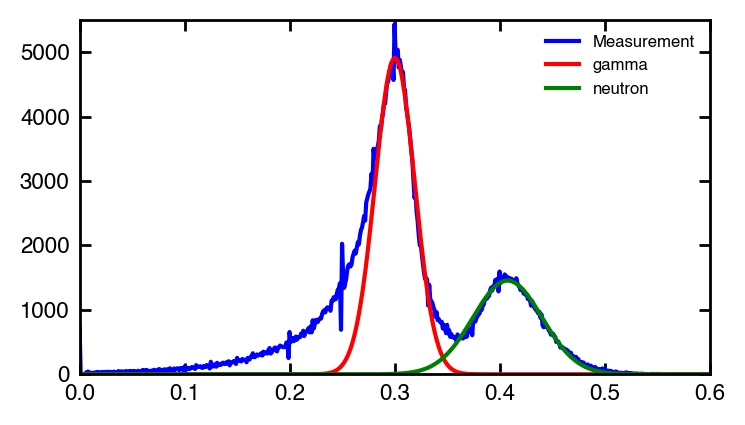

In [ ]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

plt.plot(xaxis,PSD62,'b',label='Measurement')
ragne_62_1=np.arange(290,340,1)
ga_62_para_1 = gaussian_fit(xaxis[ragne_62_1],PSD62[ragne_62_1])
print("A, x0, sigma: ",ga_62_para_1)
ga_62_1 = gauss_wo_baseline(xaxis,ga_62_para_1[0],ga_62_para_1[1],ga_62_para_1[2])
plt.plot(xaxis,ga_62_1,'r',label='gamma')

ragne_62_2=np.arange(380,600,1)
ga_62_para_2 = gaussian_fit(xaxis[ragne_62_2],PSD62[ragne_62_2])
print("A, x0, sigma: ",ga_62_para_2)
ga_62_2 = gauss_wo_baseline(xaxis,ga_62_para_2[0],ga_62_para_2[1],ga_62_para_2[2])
plt.plot(xaxis,ga_62_2,'g',label='neutron')

fig_post_def(xlim=(0,0.6),ylim=(0,5500))
FOM_62 = abs(ga_62_para_2[1]-ga_62_para_1[1])/((2*(2*np.log(2))**0.5)*(ga_62_para_2[2]+ga_62_para_1[2]))
print("FOM_62= ",FOM_62)

A, x0, sigma:  [5.11962760e+03 2.81751545e-01 1.63674044e-02]
A, x0, sigma:  [1.46679263e+03 3.85518789e-01 3.39162357e-02]
FOM_64=  0.8763464850950816


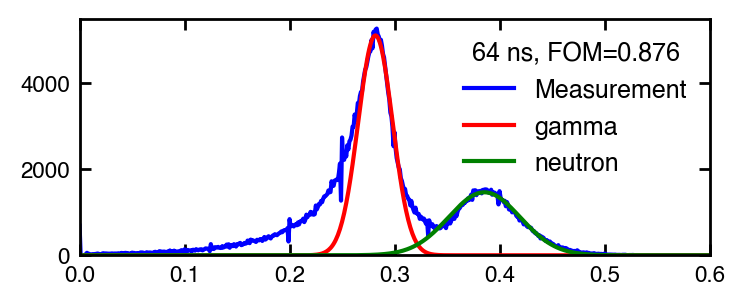

In [ ]:
fig = fig_pre_def(8,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

plt.plot(xaxis,PSD64,'b',label='Measurement')
ragne_64_1=np.arange(270,310,1)
ga_64_para_1 = gaussian_fit(xaxis[ragne_64_1],PSD64[ragne_64_1])
print("A, x0, sigma: ",ga_64_para_1)
ga_64_1 = gauss_wo_baseline(xaxis,ga_64_para_1[0],ga_64_para_1[1],ga_64_para_1[2])
plt.plot(xaxis,ga_64_1,'r',label='gamma')

ragne_64_2=np.arange(360,600,1)
ga_64_para_2 = gaussian_fit(xaxis[ragne_64_2],PSD64[ragne_64_2])
print("A, x0, sigma: ",ga_64_para_2)
ga_64_2 = gauss_wo_baseline(xaxis,ga_64_para_2[0],ga_64_para_2[1],ga_64_para_2[2])
plt.plot(xaxis,ga_64_2,'g',label='neutron')

fig_post_def(xlim=(0,0.6),ylim=(0,5500),title='64 ns, FOM=0.876',lg_fs=9)
FOM_64 = abs(ga_64_para_2[1]-ga_64_para_1[1])/((2*(2*np.log(2))**0.5)*(abs(ga_64_para_2[2])+abs(ga_64_para_1[2])))
print("FOM_64= ",FOM_64)

A, x0, sigma:  [5.38579991e+03 2.68496552e-01 1.45919611e-02]
A, x0, sigma:  [1.47989283e+03 3.70395292e-01 3.36837342e-02]
FOM_66=  0.8963601756921162


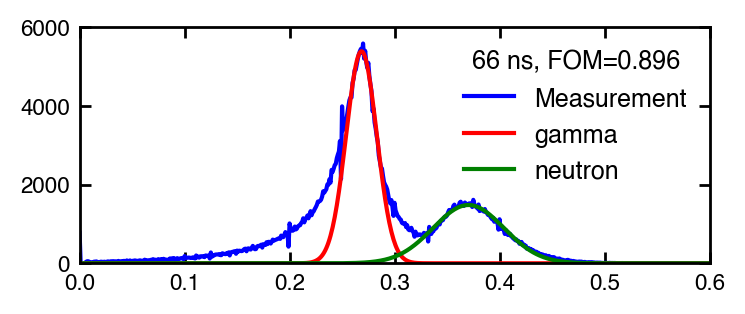

In [ ]:
fig = fig_pre_def(8,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

plt.plot(xaxis,PSD66,'b',label='Measurement')
ragne_66_1=np.arange(260,290,1)
ga_66_para_1 = gaussian_fit(xaxis[ragne_66_1],PSD66[ragne_66_1])
print("A, x0, sigma: ",ga_66_para_1)
ga_66_1 = gauss_wo_baseline(xaxis,ga_66_para_1[0],ga_66_para_1[1],ga_66_para_1[2])
plt.plot(xaxis,ga_66_1,'r',label='gamma')

ragne_66_2=np.arange(330,600,1)
ga_66_para_2 = gaussian_fit(xaxis[ragne_66_2],PSD66[ragne_66_2])
print("A, x0, sigma: ",ga_66_para_2)
ga_66_2 = gauss_wo_baseline(xaxis,ga_66_para_2[0],ga_66_para_2[1],ga_66_para_2[2])
plt.plot(xaxis,ga_66_2,'g',label='neutron')

fig_post_def(xlim=(0,0.6),ylim=(0,6000),title='66 ns, FOM=0.896',lg_fs=9)
FOM_66 = abs(ga_66_para_2[1]-ga_66_para_1[1])/((2*(2*np.log(2))**0.5)*(abs(ga_66_para_2[2])+abs(ga_66_para_1[2])))
print("FOM_66= ",FOM_66)

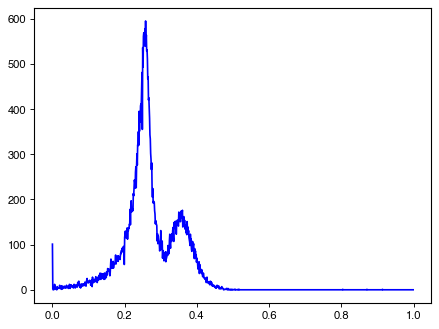

In [ ]:
plt.plot(xaxis,PSD68,'b',label='Measurement')

A, x0, sigma:  [5.32775691e+03 2.67150288e-01 1.61878803e-02]
A, x0, sigma:  [1.48809150e+03 3.70182187e-01 3.32958105e-02]
FOM_68=  0.8842028206716952


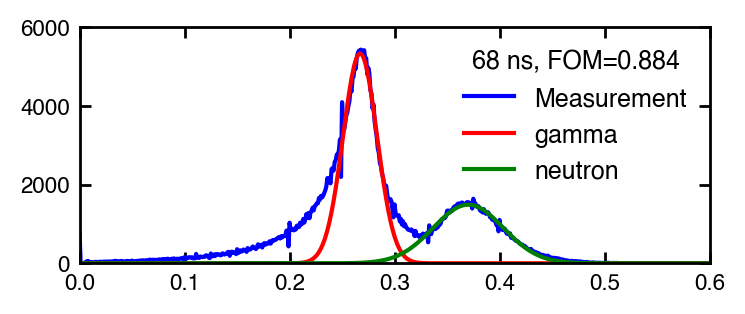

In [ ]:
fig = fig_pre_def(8,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

plt.plot(xaxis,PSD68,'b',label='Measurement')
ragne_68_1=np.arange(250,290,1)
ga_68_para_1 = gaussian_fit(xaxis[ragne_68_1],PSD68[ragne_68_1])
print("A, x0, sigma: ",ga_68_para_1)
ga_68_1 = gauss_wo_baseline(xaxis,ga_68_para_1[0],ga_68_para_1[1],ga_68_para_1[2])
plt.plot(xaxis,ga_68_1,'r',label='gamma')

ragne_68_2=np.arange(330,600,1)
ga_68_para_2 = gaussian_fit(xaxis[ragne_68_2],PSD68[ragne_68_2])
print("A, x0, sigma: ",ga_68_para_2)
ga_68_2 = gauss_wo_baseline(xaxis,ga_68_para_2[0],ga_68_para_2[1],ga_68_para_2[2])
plt.plot(xaxis,ga_68_2,'g',label='neutron')

fig_post_def(xlim=(0,0.6),ylim=(0,6000),title='68 ns, FOM=0.884',lg_fs = 9)
FOM_68 = abs(ga_68_para_2[1]-ga_68_para_1[1])/((2*(2*np.log(2))**0.5)*(abs(ga_68_para_2[2])+abs(ga_68_para_1[2])))
print("FOM_68= ",FOM_68)

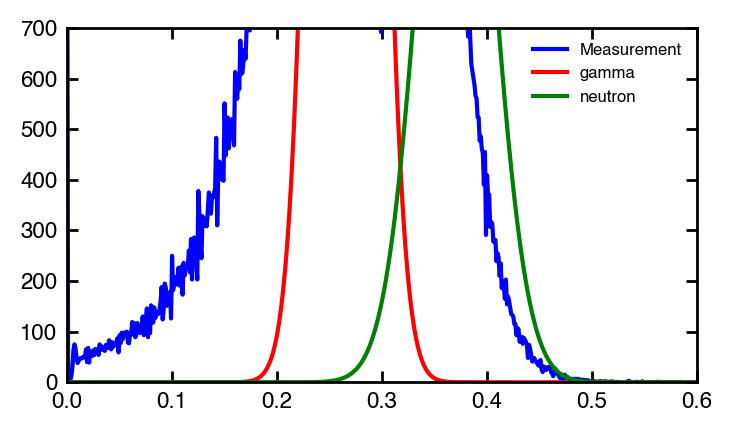

In [ ]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

plt.plot(xaxis,PSD70,'b',label='Measurement')
ragne_70_1=np.arange(210,290,1)
ga_68_para_1 = gaussian_fit(xaxis[ragne_68_1],PSD68[ragne_68_1])
ga_68_1 = gauss_wo_baseline(xaxis,ga_68_para_1[0],ga_68_para_1[1],ga_68_para_1[2])
plt.plot(xaxis,ga_68_1,'r',label='gamma')

ragne_68_2=np.arange(330,600,1)
ga_68_para_2 = gaussian_fit(xaxis[ragne_68_2],PSD68[ragne_68_2])
ga_68_2 = gauss_wo_baseline(xaxis,ga_68_para_2[0],ga_68_para_2[1],ga_68_para_2[2])
plt.plot(xaxis,ga_68_2,'g',label='neutron')

fig_post_def(xlim=(0,0.6),ylim=(0,700))